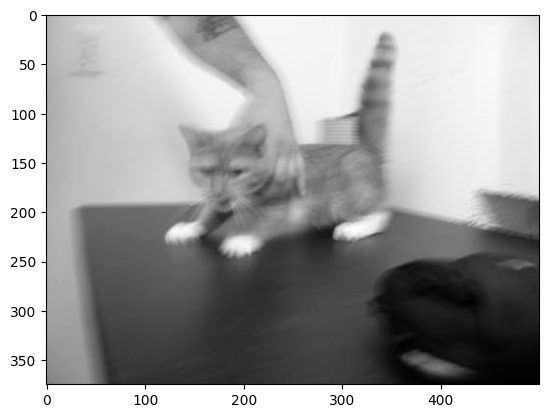

(375, 500)


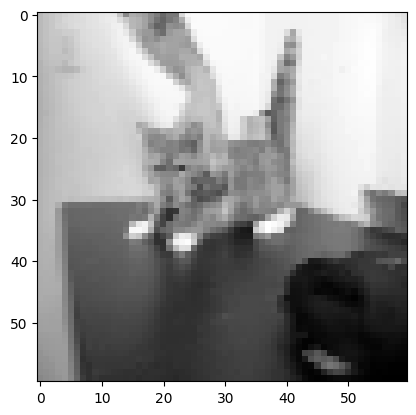

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [01:23<00:00, 149.43it/s]


0
1
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
0
0
0
0
1
0
0
1
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
0
1
1
1
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
0
0
1
0
1
1
1
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
1
0
0
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
0
1
1
1
1
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
1
1
1
0
1
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
1
1
1
0
1
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
0
1
0
0
0
0
0
0
1
0
1
1
1
0
1
1
1
1
1
0
0
0
0
1
0
0
1
0
0
0
1
1
1
0
1
1
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
1
1
0
0
1
1
1
1
1
0
1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm


DATADIR = r"C:\Users\Dhruvish\Downloads\kagglecatsanddogs_5340\PetImages"
CATEGORIES = ["Cat","Dog"]

for category in CATEGORIES:
      path = os.path.join(DATADIR,category) 
      for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray') 
        plt.show()  

        break  
      break 

print(img_array.shape)

IMG_SIZE = 60

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()


##create_training_dataset()
##print(len(training_data))

random.shuffle(training_data)
for sample in training_data:
    print(sample[1])


X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()
          

        
